# textual inversion

1. 加载 stable-diffusion-xl-base-1.0 用中文灵芝作为提示词,画个图,可见这个模型不能画出灵芝.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

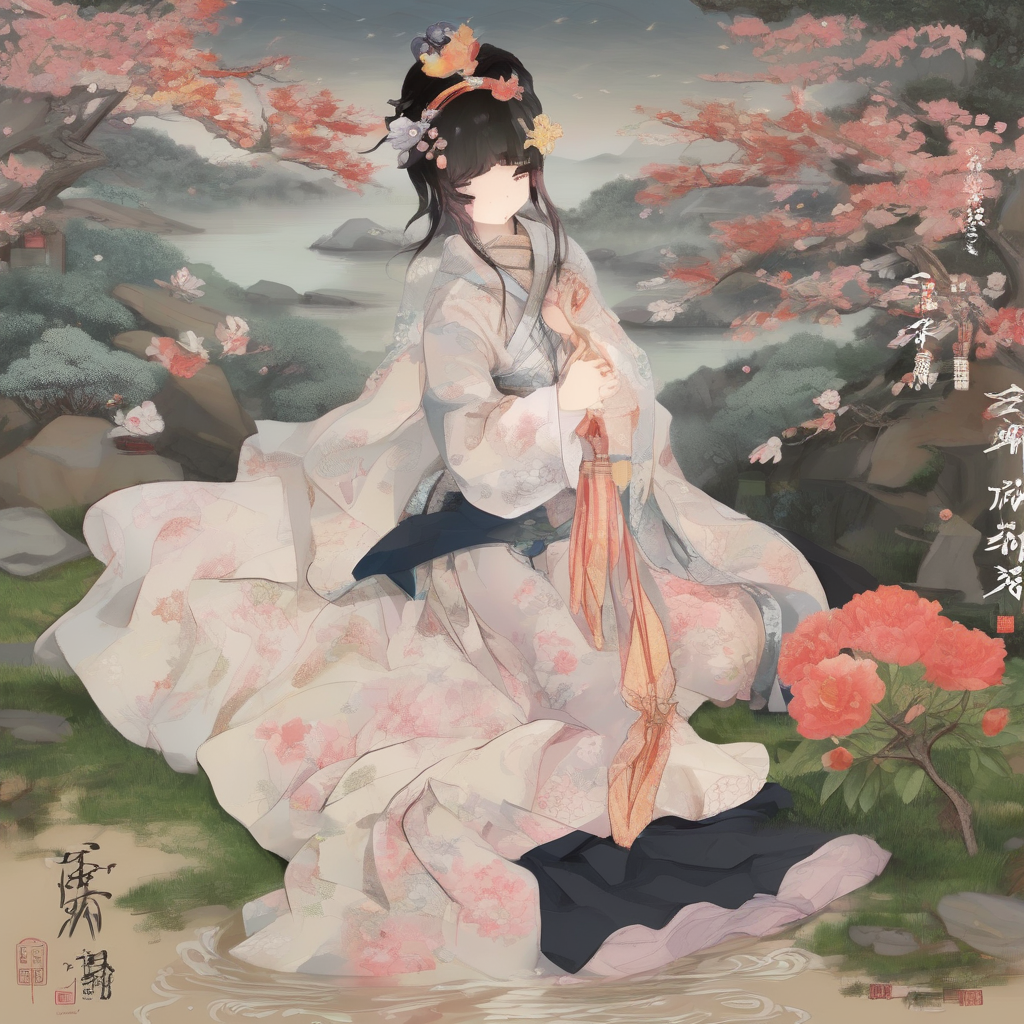

In [9]:
from diffusers import AutoPipelineForText2Image
import torch
pipe = AutoPipelineForText2Image.from_pretrained("./stable-diffusion-xl-base-1.0", variant="fp16", torch_dtype=torch.float16)
pipe.to("cuda")
generator = torch.Generator().manual_seed(100)
pipe("灵芝", generator=generator).images[0]

2. 先去下载一些灵芝的图片,看看这些图片.

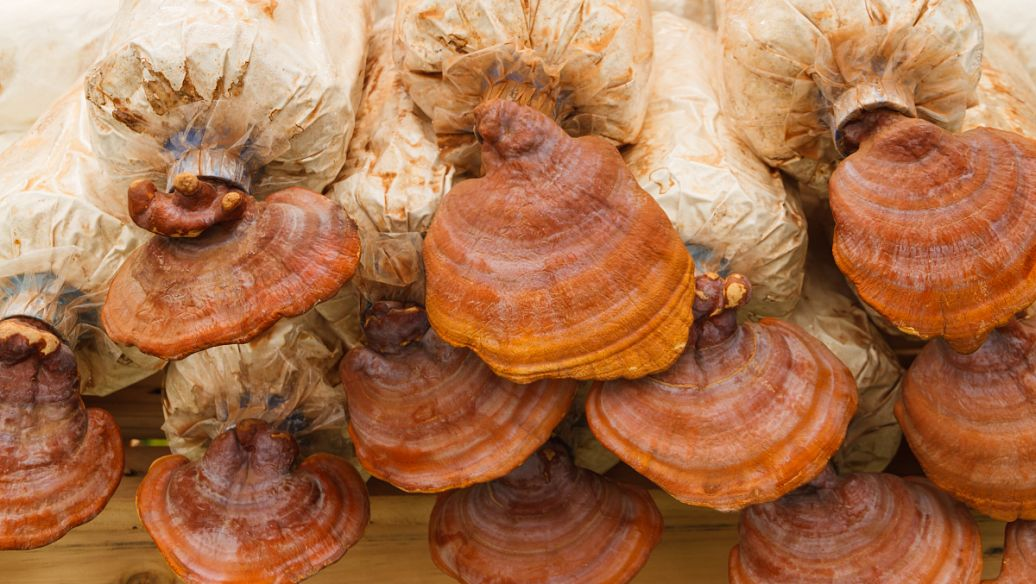

In [10]:
from PIL import Image
Image.open('./lingzhi/10001.jpg')

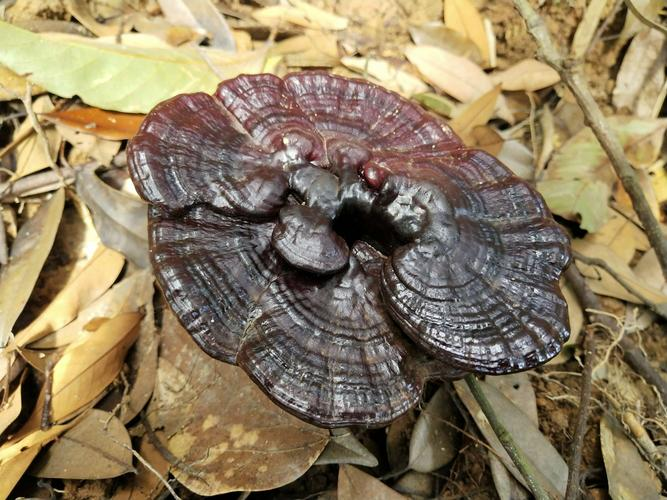

In [11]:
Image.open('./lingzhi/10021.jpg')

3. 参照 huggingface 中[text_inversion](https://huggingface.co/docs/diffusers/training/text_inversion) 的方式训练模型.

In [ ]:
export MODEL_NAME="/home/zjt/workspace/text2img/stable-diffusion-xl-base-1.0"
export DATA_DIR="/home/zjt/workspace/text2img/lingzhi"

accelerate launch textual_inversion_sdxl.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --train_data_dir=$DATA_DIR \
  --learnable_property="object" \
  --placeholder_token="<灵芝>" \
  --initializer_token="fungi" \
  --mixed_precision="bf16" \
  --resolution=768 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=1000 \
  --learning_rate=8.0e-04 \
  --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --save_as_full_pipeline \
  --output_dir="./textual_inversion_lingzhi_sdxl"

4. 训练完成之后 load_textual_inversion 看看效果

In [12]:
pipe.load_textual_inversion("/home/zjt/aistudio/diffusers/examples/textual_inversion/textual_inversion_lingzhi_sdxl")

  0%|          | 0/50 [00:00<?, ?it/s]

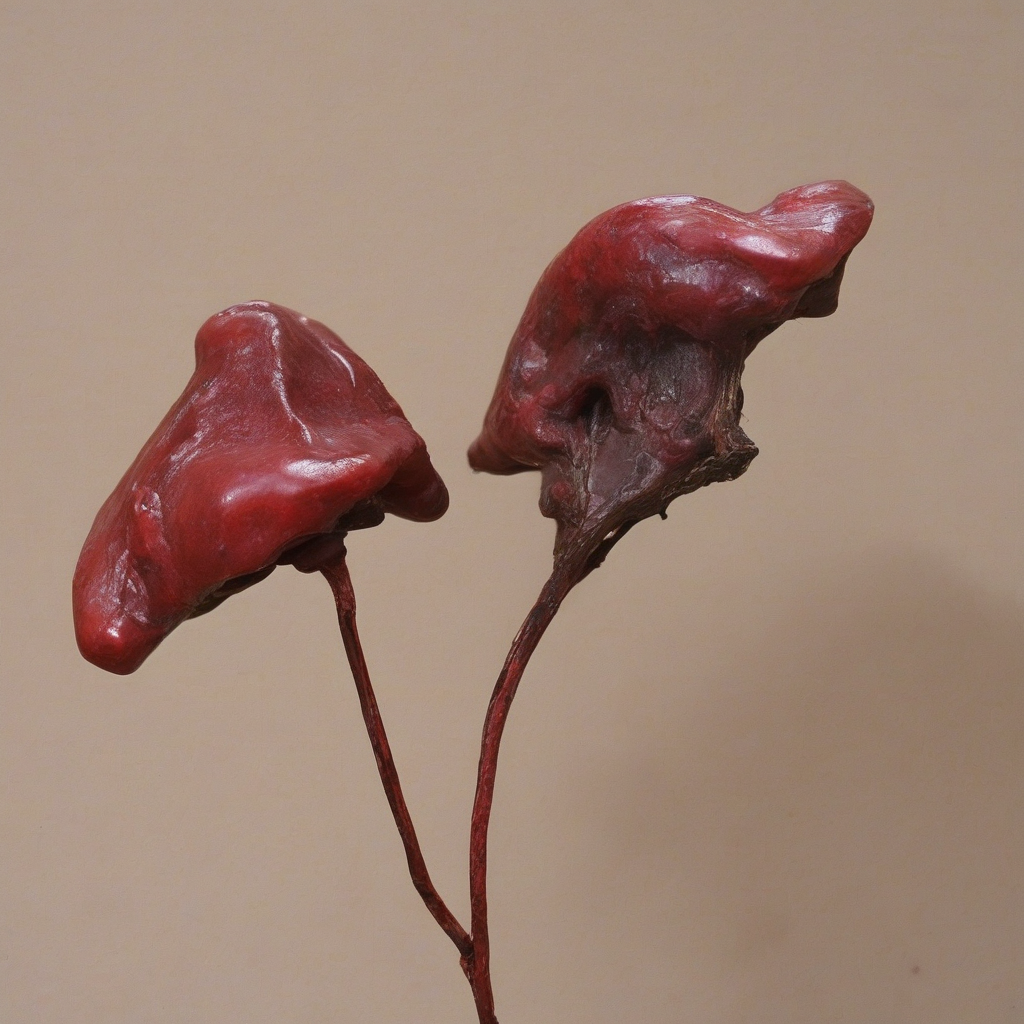

In [15]:
pipe("一个 <灵芝>", generator=generator).images[0]



5. 看起来像是学会了一些东西,但是没有学会很多.